Name: Rajib Regmi
ID: 2438399

In [ ]:
import pandas as pd

# Load the dataset
file_path = "/content/drive/MyDrive/Concept and technology of ai/heart_attack_risk_dataset.csv"  # Replace with your actual file path
df = pd.read_csv(file_path)

# Display the first few rows of the dataset to confirm it's loaded correctly
print(df.head())


   Age  Gender  Smoking  Alcohol_Consumption Physical_Activity_Level    BMI  \
0   69  Female        1                    0                Moderate  34.61   
1   32    Male        0                    0                Moderate  22.75   
2   89    Male        0                    1                Moderate  35.32   
3   78    Male        0                    1                Moderate  18.23   
4   38  Female        1                    0                Moderate  19.82   

   Diabetes  Hypertension  Cholesterol_Level  Resting_BP  Heart_Rate  \
0         1             0              152.1         171          85   
1         0             0              166.8         126         103   
2         0             0              272.3         123         127   
3         1             0              237.7         144         125   
4         0             0              207.7         123         107   

   Family_History Stress_Level Chest_Pain_Type        Thalassemia  \
0               0     M

In [ ]:
# Count occurrences of each category in the 'Heart_Attack_Risk' column
risk_counts = df["Heart_Attack_Risk"].value_counts()

# Display the counts
print("Original Counts:\n", risk_counts)


Original Counts:
 Heart_Attack_Risk
Low         25024
Moderate    14904
High        10072
Name: count, dtype: int64


In [ ]:
# Identify the category with the lowest count
min_risk_category = risk_counts.idxmin()

# Filter out rows with the category having the lowest count
filtered_df = df[df["Heart_Attack_Risk"] != min_risk_category]

# Display the category that was removed
print("\nCategory Removed:", min_risk_category)




Category Removed: High


In [ ]:
# Display the updated counts after filtering
print("\nUpdated Counts:\n", filtered_df["Heart_Attack_Risk"].value_counts())



Updated Counts:
 Heart_Attack_Risk
Low         25024
Moderate    14904
Name: count, dtype: int64


In [ ]:
# Save the filtered dataset to a new CSV file
filtered_csv_path = "filtered_heart_attack_risk_dataset.csv"
filtered_df.to_csv(filtered_csv_path, index=False)

# Print the path where the filtered dataset is saved
print(f"\nFiltered dataset saved at: {filtered_csv_path}")




Filtered dataset saved at: filtered_heart_attack_risk_dataset.csv


In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.utils import resample

In [60]:

# Load dataset
file_path = "/content/filtered_heart_attack_risk_dataset.csv"
df = pd.read_csv(file_path)

# Encode target variable
label_encoder = LabelEncoder()
df["Heart_Attack_Risk"] = label_encoder.fit_transform(df["Heart_Attack_Risk"])

# Selecting relevant features
features = ["Age", "Gender", "Hypertension", "Family_History", "Smoking", "Alcohol_Consumption", "Cholesterol_Level"]
target = "Heart_Attack_Risk"

# Encode categorical variable (Gender)
df["Gender"] = df["Gender"].map({"Male": 1, "Female": 0})

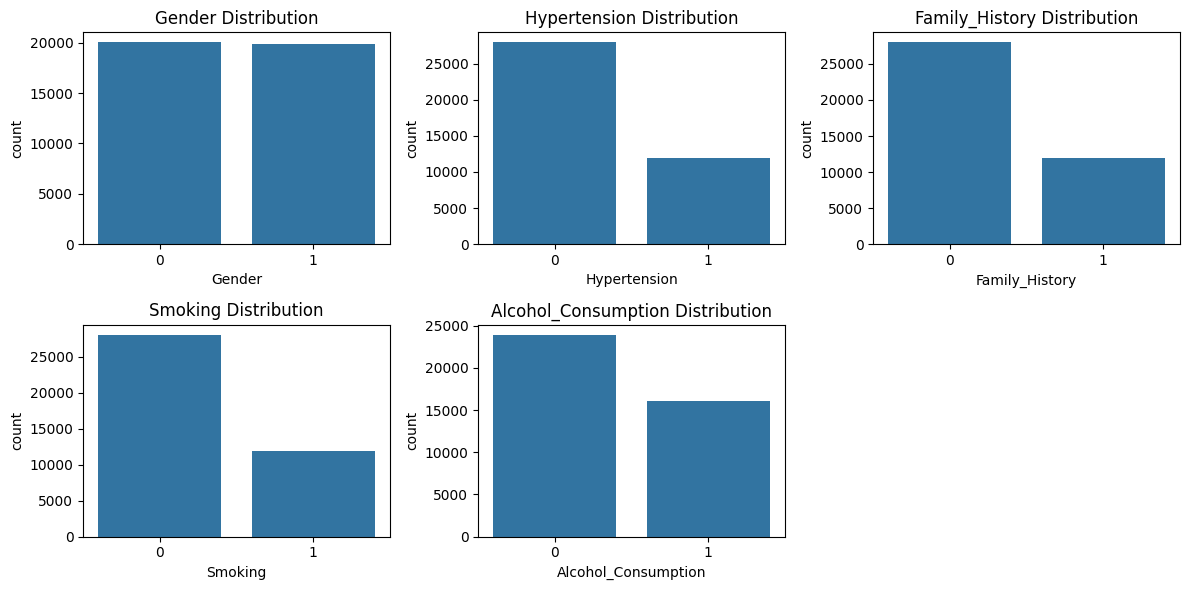

In [61]:
# Countplot for categorical features
plt.figure(figsize=(12, 6))
categories = ["Gender", "Hypertension", "Family_History", "Smoking", "Alcohol_Consumption"]
for i, category in enumerate(categories):
    plt.subplot(2, 3, i + 1)
    sns.countplot(x=df[category])
    plt.title(f"{category} Distribution")
plt.tight_layout()
plt.show()

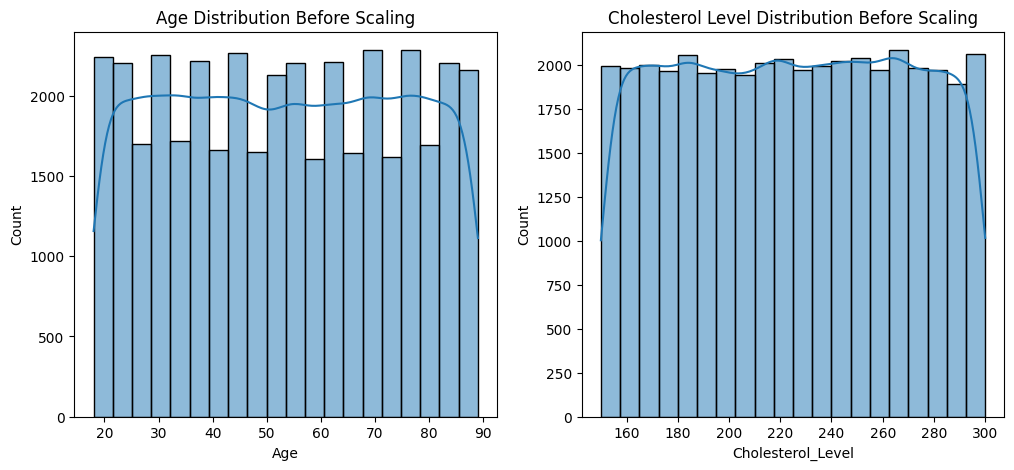

In [62]:
# Histograms before scaling
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df["Age"], bins=20, kde=True, ax=ax[0])
ax[0].set_title("Age Distribution Before Scaling")
sns.histplot(df["Cholesterol_Level"], bins=20, kde=True, ax=ax[1])
ax[1].set_title("Cholesterol Level Distribution Before Scaling")
plt.show()

In [63]:

# Scale numerical features
scaler = StandardScaler()
df[["Age", "Cholesterol_Level"]] = scaler.fit_transform(df[["Age", "Cholesterol_Level"]])

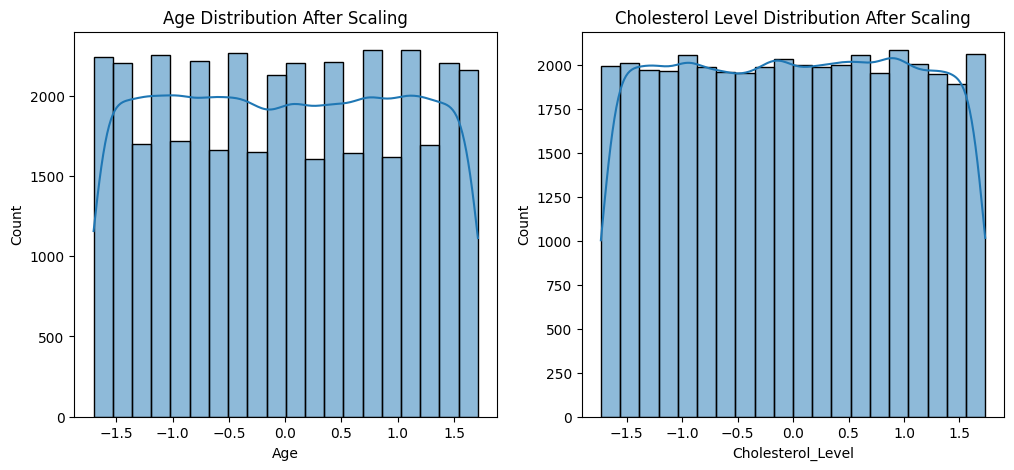

In [64]:

# Histograms after scaling
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df["Age"], bins=20, kde=True, ax=ax[0])
ax[0].set_title("Age Distribution After Scaling")
sns.histplot(df["Cholesterol_Level"], bins=20, kde=True, ax=ax[1])
ax[1].set_title("Cholesterol Level Distribution After Scaling")
plt.show()

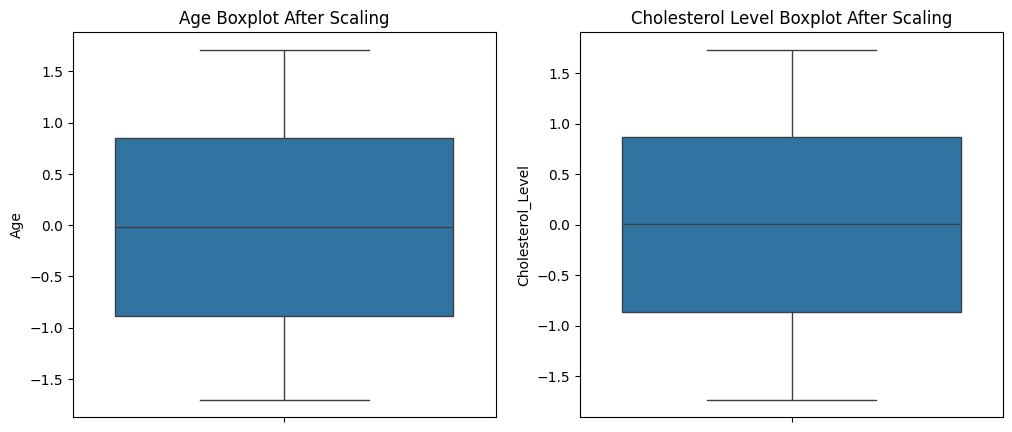

In [65]:

# Boxplots for numerical features
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(y=df["Age"], ax=ax[0])
ax[0].set_title("Age Boxplot After Scaling")
sns.boxplot(y=df["Cholesterol_Level"], ax=ax[1])
ax[1].set_title("Cholesterol Level Boxplot After Scaling")
plt.show()


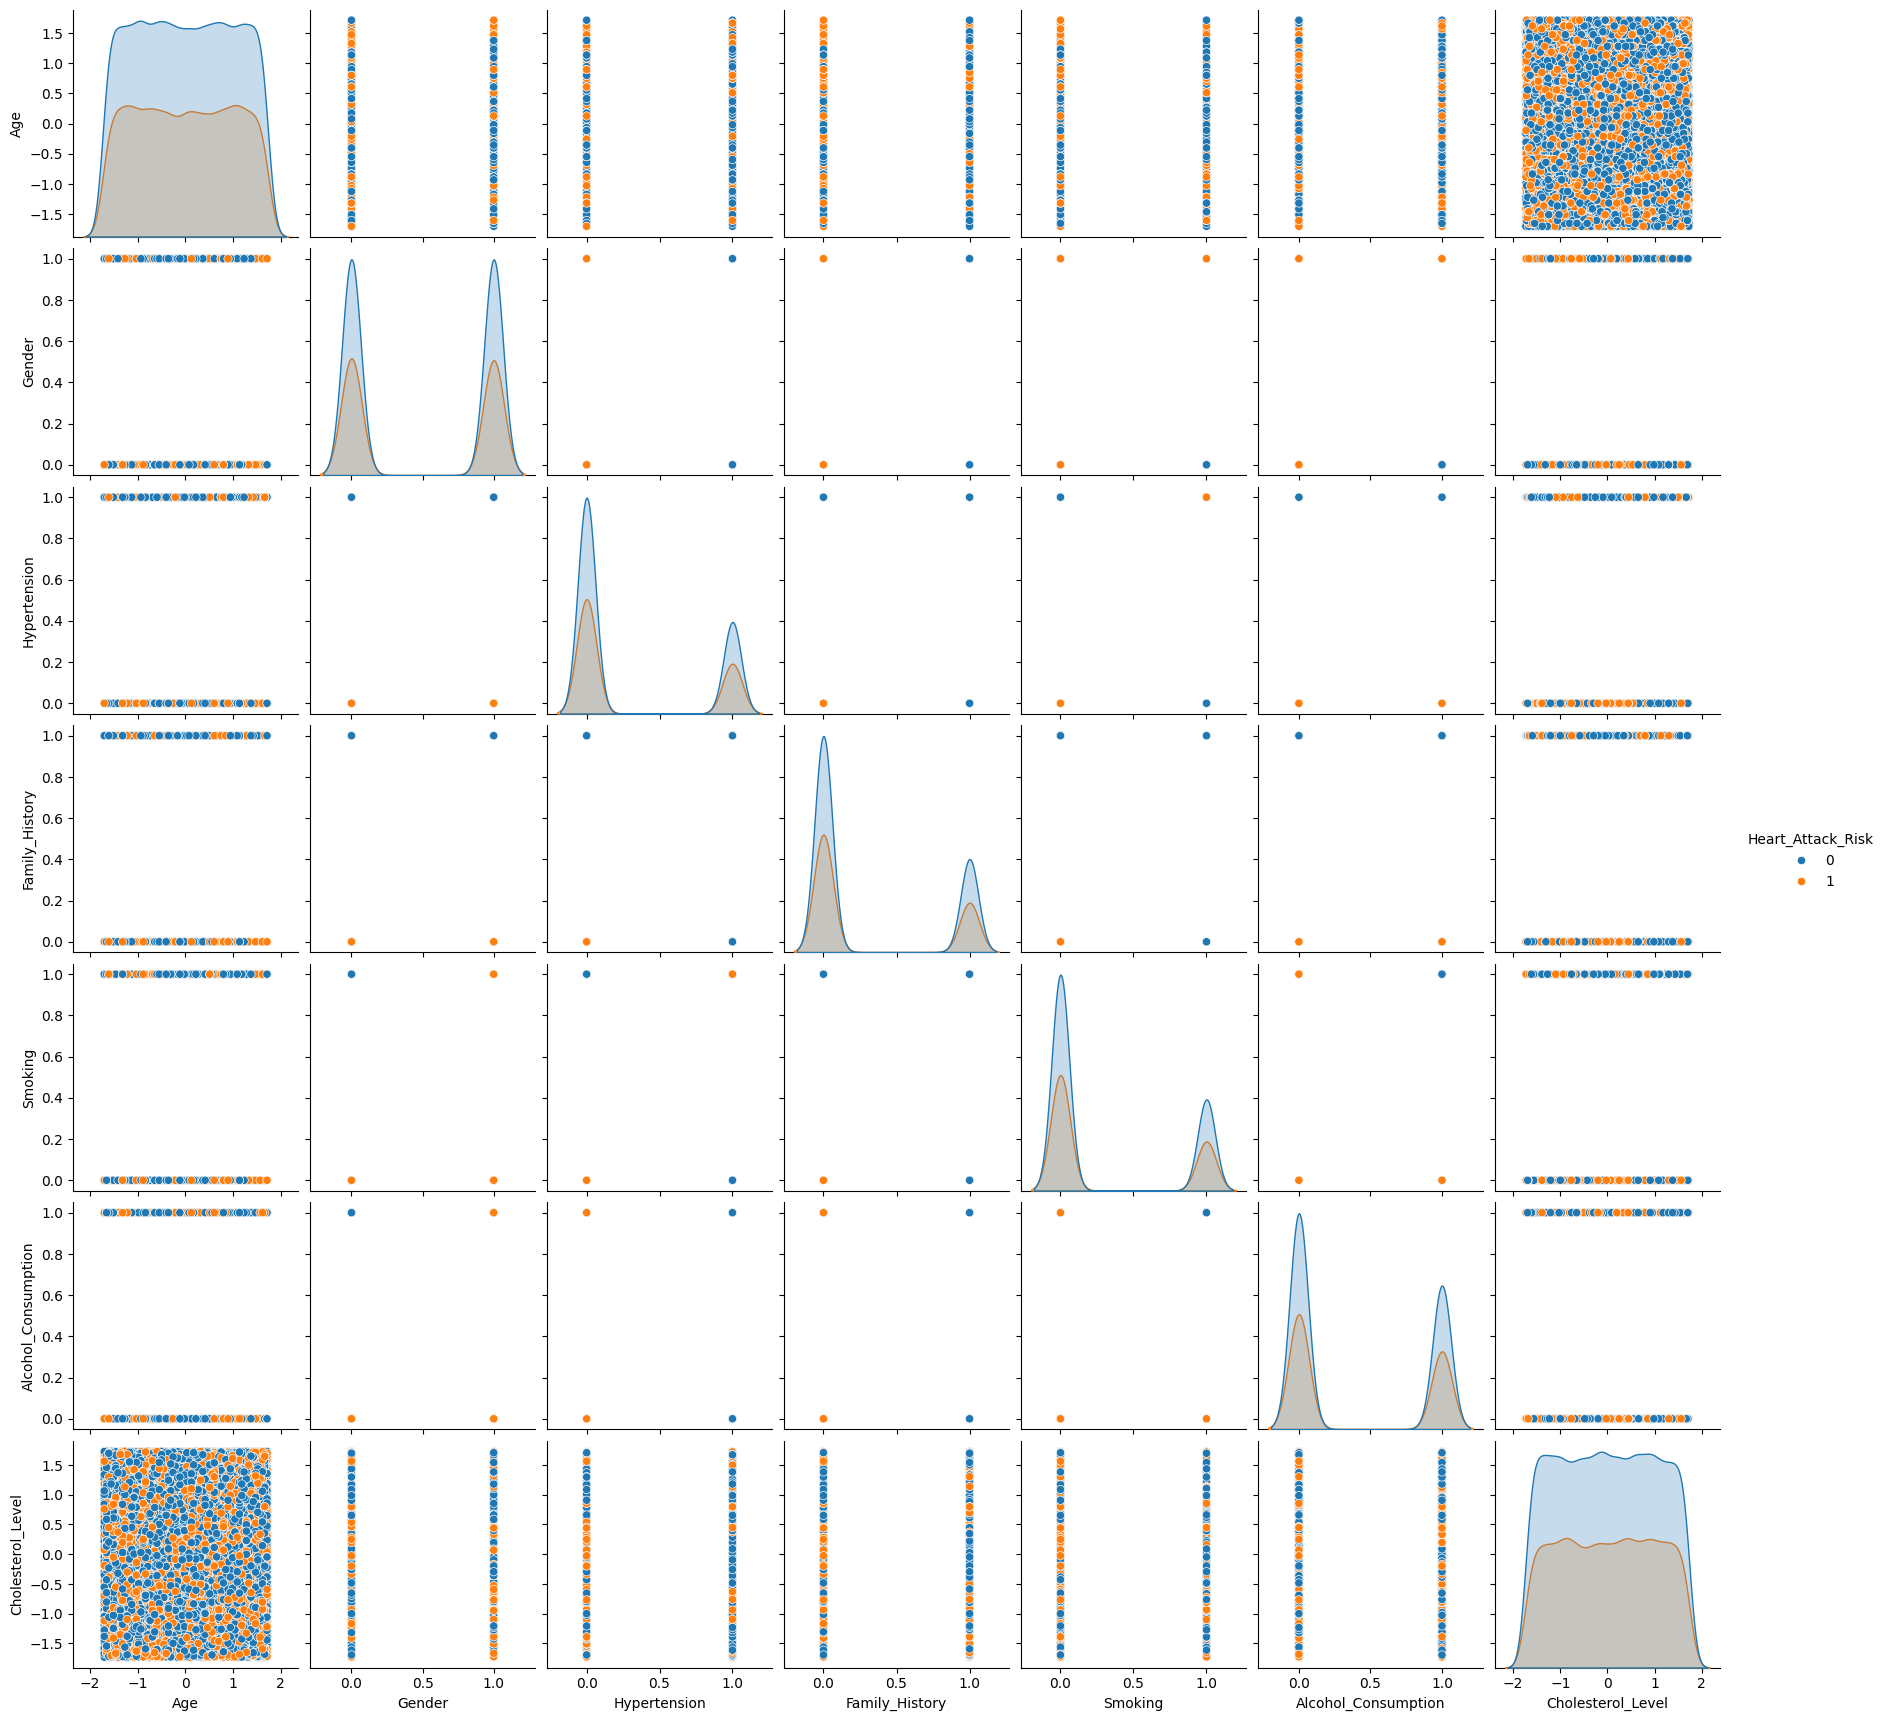

In [79]:
# Convert categorical features to numeric
df_encoded = df.copy()
df_encoded["Gender"] = df_encoded["Gender"].astype(int)
df_encoded["Hypertension"] = df_encoded["Hypertension"].astype(int)
df_encoded["Family_History"] = df_encoded["Family_History"].astype(int)
df_encoded["Smoking"] = df_encoded["Smoking"].astype(int)
df_encoded["Alcohol_Consumption"] = df_encoded["Alcohol_Consumption"].astype(int)

# Pairplot for feature relationships
sns.pairplot(df_encoded[features + [target]], hue=target, diag_kind="kde")
plt.show()


In [69]:
# Split data
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
# Logistic Regression Model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
y_prob_log = log_reg.predict_proba(X_test)[:, 1]

In [71]:
# Evaluate Logistic Regression
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))

Logistic Regression Accuracy: 0.6323566240921613
Confusion Matrix:
 [[5050    0]
 [2936    0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.63      1.00      0.77      5050
           1       0.00      0.00      0.00      2936

    accuracy                           0.63      7986
   macro avg       0.32      0.50      0.39      7986
weighted avg       0.40      0.63      0.49      7986



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


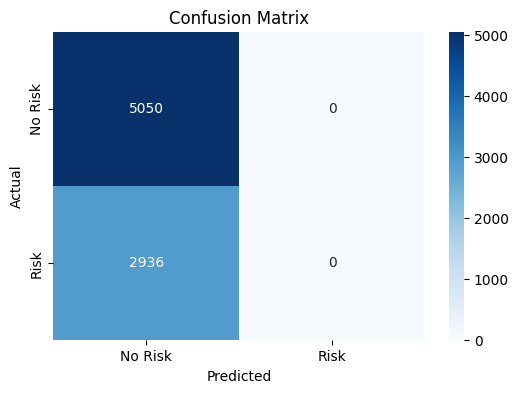

In [72]:
# Confusion Matrix Visualization
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt="d", cmap="Blues", xticklabels=["No Risk", "Risk"], yticklabels=["No Risk", "Risk"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

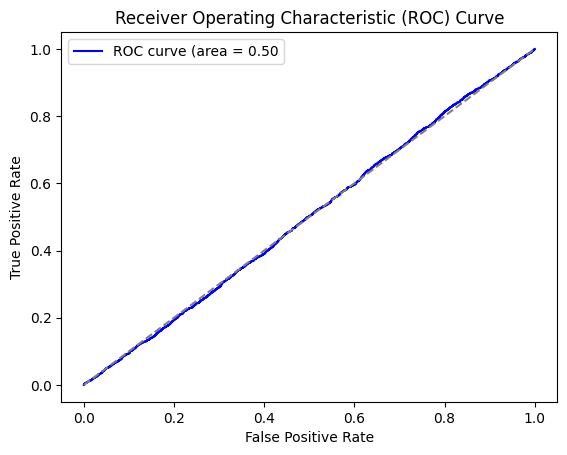

In [73]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob_log)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

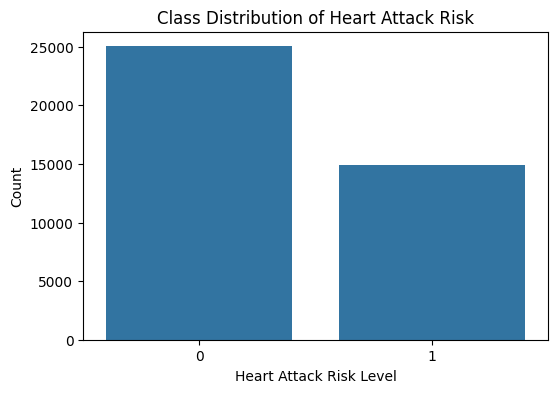

In [74]:
# Class distribution visualization
plt.figure(figsize=(6, 4))
sns.countplot(x=df["Heart_Attack_Risk"])
plt.title("Class Distribution of Heart Attack Risk")
plt.xlabel("Heart Attack Risk Level")
plt.ylabel("Count")
plt.show()

In [75]:
# Balancing dataset with random oversampling
df_majority = df[df[target] == 0]
df_minority = df[df[target] == 1]
df_minority_upsampled = resample(df_minority, replace=True, n_samples=len(df_majority), random_state=42)
df_balanced = pd.concat([df_majority, df_minority_upsampled]).sample(frac=1, random_state=42).reset_index(drop=True)

In [76]:
# Split balanced data
X_balanced = df_balanced[features]
y_balanced = df_balanced[target]
X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

In [77]:
# Re-train logistic regression on balanced data
log_reg_bal = LogisticRegression()
log_reg_bal.fit(X_train_bal, y_train_bal)
y_pred_log_bal = log_reg_bal.predict(X_test_bal)

In [78]:
# Evaluate Logistic Regression on balanced data
print("Balanced Logistic Regression Accuracy:", accuracy_score(y_test_bal, y_pred_log_bal))
print("Confusion Matrix:\n", confusion_matrix(y_test_bal, y_pred_log_bal))
print("Classification Report:\n", classification_report(y_test_bal, y_pred_log_bal))


Balanced Logistic Regression Accuracy: 0.5055944055944056
Confusion Matrix:
 [[2590 2413]
 [2536 2471]]
Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.52      0.51      5003
           1       0.51      0.49      0.50      5007

    accuracy                           0.51     10010
   macro avg       0.51      0.51      0.51     10010
weighted avg       0.51      0.51      0.51     10010

